# **Day 3 Part 2**

## **Evaluation metrics, imbalanced datasets, ensemble models**


1. **Anda seorang Data Scientist di sebuah perusahaan FinTech dan diminta untuk mengimplementasikan sebuah sistem pendeteksi nasabah gagal bayar (default). Perusahaan Anda menilai bahwa kerugian ketika salah memprediksi nasabah yang mampu melunasi pembayaran sebagai nasabah gagal bayar lebih besar dibanding kerugian ketika salah memprediksi nasabah gagal bayar sebagai nasabah yang mampu melunasi pembayaran.**<br><br>
**Metric yang perlu coba diminimalkan oleh model Anda adalah** <br><br>
    a. F1 score<br>
    b. Precision<br>
    c. Recall<br>
    d. False Positive Rate<br>
    e. False Negative Rate
<br><br>
2. **Strategi apa saja yang bisa dilakukan ketika Anda memiliki masalah imbalanced class dataset?**
<br><br>
3. **Manakah pernyataan yang tidak tepat mengenai metode bagging?**<br><br>
    a. Metode bagging mengurangi nilai variance pada model.<br>	
    b. Bootstrapping sample dilakukan pada metode bagging.<br>	
    c. Metode bagging bekerja secara sekuensial.<br>	
    d. Random Forest adalah salah satu contoh model yang menerapkan metode bagging.<br>	
    e. Majority voting dilakukan untuk mendapatkan hasil prediksi akhir pada metode bagging.
<br><br>
4. **Pada model bagging yang menggunakan decision tree sebagai base learner, manakah cara kerja model bagging berikut yang kurang tepat dalam mengoptimalkan prediksi yang dihasilkan?**<br><br>
    a. Menjalankan semua base learner secara paralel.<br>
    b. Melakukan hyperparameter tuning untuk menentukan jumlah base learner yang paling optimal terhadap data.<br>
    c. Setiap base learner di-tuning dengan hyperparameter yang sama, sehingga dapat menghasilkan tree yang sangat mirip satu sama lain.<br>
    d. Hasil prediksi dari setiap base learner diagregasi dengan cara majority vote.<br>
    e. Dilakukan bootstrap-sampling untuk memiliki karakteristik data yang berbeda pada tiap base learner.

--------------------------


# **Evaluation metrics**

*Figure source: http://www.chioka.in/class-imbalance-problem/*

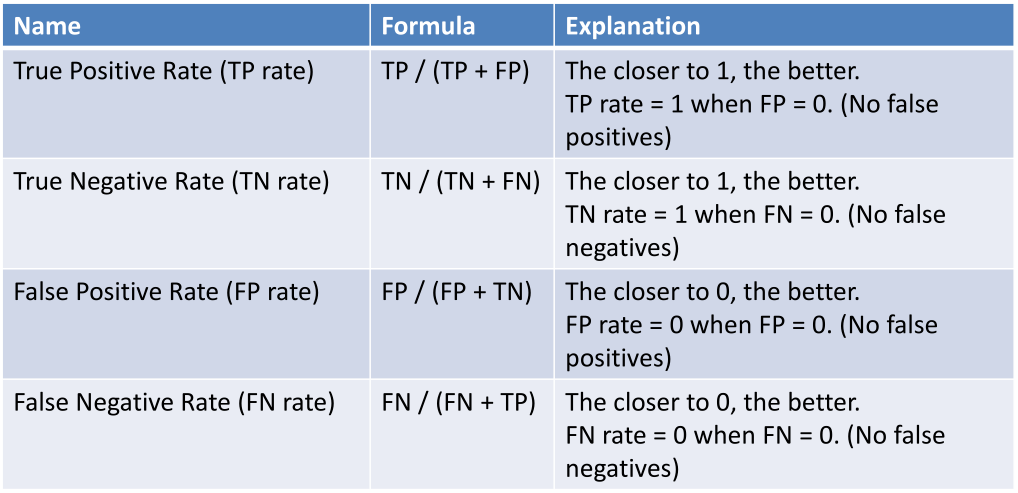

False Negative Rate berarti jumlah orang yang salah diprediksi sebagai default (FN) dibagi jumlah orang yang salah diprediksi sebagai default (FN) ditambah jumlah orang yang default (TP). 
<br><br>
Dengan kata lain, untuk kasus ini, berarti model yang dibuat banyak salah memprediksi nasabah yang sebenarnya mampu melunasi pembayaran sebagai nasabah gagal bayar. Untuk dapat mencapai tujuan bisnis, maka FNR harus ditekan.


# **Imbalanced Datasets**

- Imbalanced datasets terjadi ketika jumlah sample pada kelas yang berbeda terpaut cukup jauh.
- Berdasarkan *Google Developers*, degree of imbalance dapat dibagi menjadi 3 berdasarkan jumlah proporsi kelas minoritasnya, yaitu:
  
  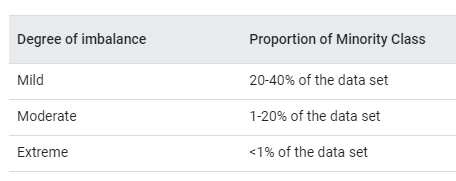

*Source: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data#:~:text=Imbalanced%20Data%20bookmark_border,smaller%20proportion%20are%20minority%20classes.*

**Beberapa cara untuk mengatasi masalah imbalanced datasets:**

- Melakukan oversampling atau undersampling.
- Mengumpulkan lebih banyak data (pada minority class).
- Melakukan feature engineering (contoh: menggunakan polynomial features).
- Menerapkan ensemble model pada resampled dataset yang berbeda-beda. 
- Melakukan clustering pada majority class dengan jumlah cluster sejumlah data minority class, lalu diambil centroid-nya saja.
- Menggunakan ensemble model, seperti XGBoost.


# **Ensemble Models**

Ensemble model adalah gabungan beberapa model (weak learners) yang dilatih untuk dapat mengatasi permasalahan yang sama dengan tujuan untuk mendapatkan hasil yang lebih baik.
<br><br>
Ensemble model dapat diaplikasikan pada regresi dan klasifikasi.

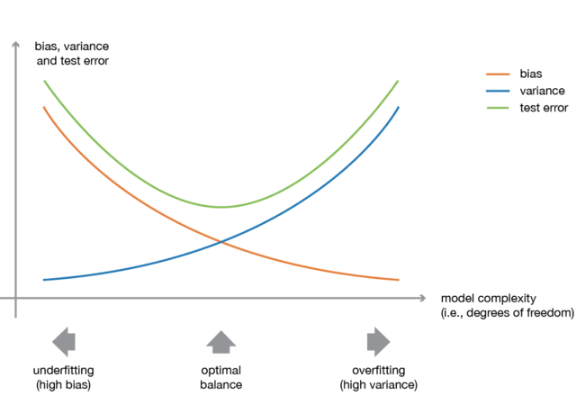

*Figure source: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205*

## **Base model (weak learner) dan hubungannya dengan ensemble model**

- Base model memiliki karakteristik masing-masing, ada yang low bias high varince (contoh: decision tree) dan ada juga yang low variance high bias (contoh: linear regression).
- Ide utama dari ensemble model adalah mengombinasikan beberapa weak learner agar bisa menghasilkan satu strong learner/ensemble model yang memiliki performa lebih baik.
- Ensemble model dapat dibagi ke dalam dua tipe, yaitu homogenous (similar) dan heterogenous (various) model.
<br><br>
- Tipe homogenous (boosting dan bagging) yang akan lebih dibahas.
- Base model yang dapat digunakan untuk boosting dan bagging tidaklah hanya terbatas pada decision tree saja, melainkan bisa juga menggunakan classical machine learning model yang lain.
<br><br>
- Namun, perlu diingat bahwa penggunaan metode agregasi/ensemble ini harus disesuaikan dengan karakteristik base modelnya. Sebagai contoh, untuk base model yang memiliki karakteristik low bias high variance, maka metode agregasi yang digunakan adalah metode yang memiliki kecenderungan untuk mengurangi variance, begitu juga sebaliknya.
  - Bagging: memiliki kecenderungan untuk dapat mengurangi variance base model.
  - Boosting: memilki kecenderungan untuk dapat mengurangi bias base model, meskipun nilai variance juga dapat dikurangi dengan metode ini, tapi tidak sesignifikan bagging.

## **Bagging (bootstrap aggregating)**

### **Bootstrap sampling**
 

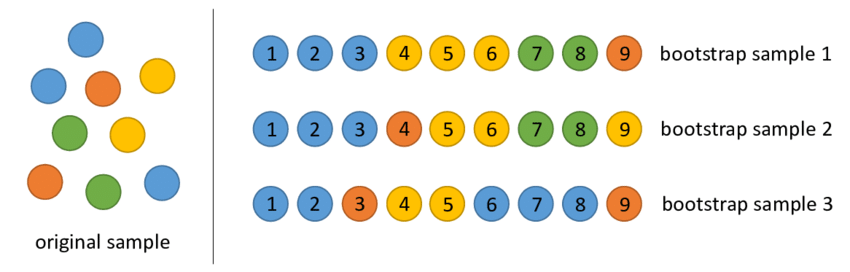

*Figure source: https://www.researchgate.net/publication/322179244_Data_Mining_Accuracy_and_Error_Measures_for_Classification_and_Prediction/figures*


- Metode bagging menggunakan bootstrap sampling, di mana sampling dilakukan secara random dari dataset awal, namun data poin yang sama dapat tersampling lebih dari satu kali. 
- Dalam statistik, bootstrap samples sering digunakan untuk mengevaluasi variance atau juga confidence intervals dari suatu estimator statistik atau bisa disebut juga function dari observasi yang dilakukan.
<br><br>

- Dalam sklearn, untuk mengatur ukuran dari bootstrap samples, bisa menggunakan hyperparameter 'bootstrap = True' dan 'max_samples'.

### **Bagging**

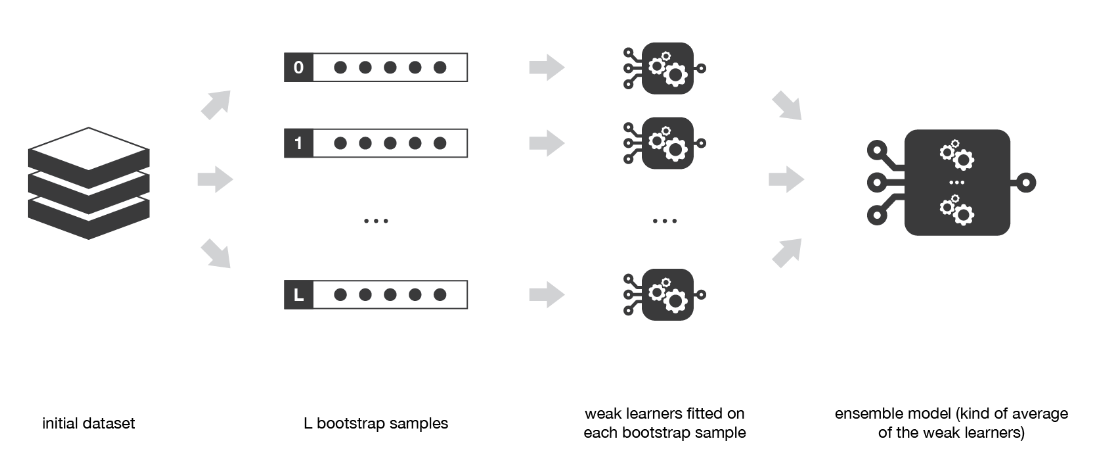

*Figure source: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205*

- Bagging bekerja secara paralel, dengan kata lain kita mem-fitting beberapa base model secara independen dengan base model lainnya. Oleh karena itu, training dapat dilakukan dalam waktu yang bersamaan.
- Ide dari cari kerja bagging adalah sebagai berikut:
  - Jika kita menggunakan kombinasi bootstrap samples dan beberapa base model dengan high variance dan low bias, maka output yang didapat adalah model dengan variance yang berbeda-beda.
  - Dengan metode bagging, kita fitting beberapa base model independen tersebut dan merata-ratakan prediksinya untuk bisa mendapatkan sebuah ensemble model dengan variance yang lebih rendah.
<br><br>
- Untuk masalah regresi, output dari beberapa model independen dapat secara langsung dirata-ratakan untuk bisa mendapatkan hasil akhir/output ensemble modelnya.
- Untuk masalah klasifikasi, output ensemble model didapat dengan cara 'majority vote', bisa dengan cara hard-voting maupun soft-voting.

### **Random Forest**

- Menggunakan base model decision tree.
- Tree bisa saja shallow (memiliki depth rendah) dan juga deep (depth tinggi).
- Shallow trees memiliki variance rendah bias tinggi (lebih cocok menggunakan metode boosting).
- Deep trees memiliki variance tinggi bias rendah (lebih cocok menggunakan metode bagging).
<br><br>
- Oleh karena itu, karena random forest mengaplikasikan metode bagging, biasanya dipakailah trees dengan depth yang cukup tinggi (high variance low bias), lalu difitting dengan bootstrap samples, dan tiap tree dikombinasikan untuk bisa menghasilkan output model dengan variace yang lebih rendah.
- Perlu diingat bahwa tiap tree yang digunakan diasumsikan memiliki korelasi rendah atau tidak berkorelasi dengan tree lainnya.
<br><br>
- **Namun, pada random forest, dalam membangun tiap tree, bootstrap sample tidak hanya dilakukan pada data poin saja, melainkan pada features juga.** Kita bisa mengatur berapa banyak fitur yang akan dimasukkan ke dalam perhitungan.

*Semua parameter yang bisa digunakan dapat dibaca di dokumentasi random forest sklearn:*<br>
*(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*

## **Boosting**

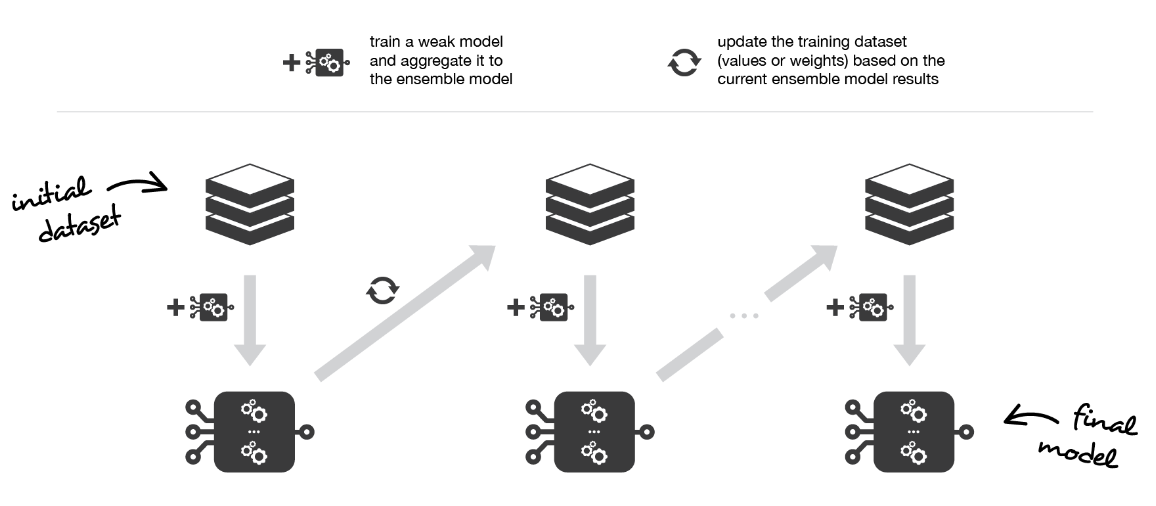

*Figure source: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205*

- Boosting bekerja secara sekuensial. Dengan kata lain, weak learners tidak lagi independen antara satu dengan yang lain, namun bekerja secara iteratif bergantung dari hasil pada output sebelumnya.
- Boosting menghasilkan ensemble model dengan bias yang lebih rendah dibandingkan base model. 
- Oleh karena itu, base model yang digunakan sebaiknya model dengan bias tinggi variance rendah. Contoh, jika menggunakan decision tree sebagai base model, depth yang digunakan adalah shallow depth (depth rendah).

### **Adaptive Boosting (adaboost)**

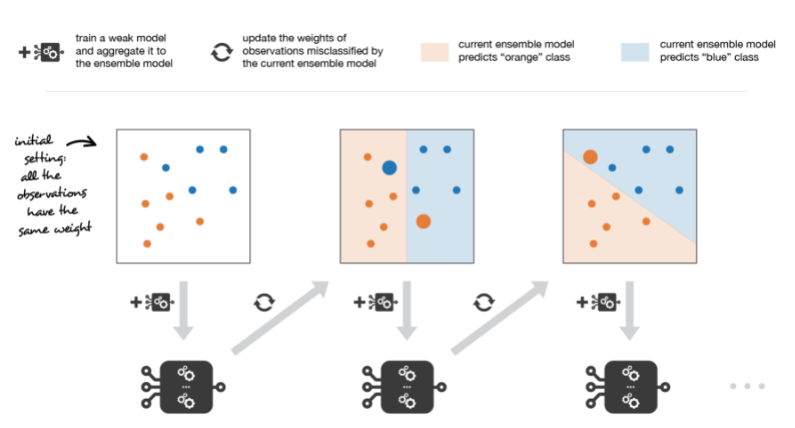

*Figure source: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205*

  Cara kerja dari metode adaptive boosting adalah pertama-tama, kita membuat satu tree, lalu kita perbaiki modelnya dengan cara memberikan perhatian lebih atau bobot yang lebih besar terhadap data poin yang hasil klasifikasinya salah. Proses tersebut dilakukan terus menerus hingga titik tertentu. Prediksi akhir diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah dibuat sebelumnya. 